7
      question          worker  answer
4169         1  A3E157ZN8XPUKJ       2
4164         1   ATQWZNGQCN1RA       0
4163         1    AKBP92VUQ7G3       2
4168         1   AWRAXV1RIYR0M       2
4162         1  A3NU1SQPI1NXY4       2
...        ...             ...     ...
3267       584  A2V3P1XE33NYC3       1
3264       584    AKBP92VUQ7G3       1
3263       584  A3NU1SQPI1NXY4       1
3266       584  A2H321P1NSEW35       1
3268       584  A2UFD1I8ZO1V4G       1

[4088 rows x 3 columns]
27 & 584 & 4088 & 151.41$\pm$355.04 & 7.0$\pm$0.0 & 587
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.9900684931506849 1.0
t-test Ttest_relResult(statistic=-3.721229016675483, pvalue=0.0002019945984217173)
z-score 0.0688762274068327
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.9900684931506849 1.0
t-test Ttest_relResult(statistic=-3.721229016675483, pvalue=0.0002019945984217173)
z-score 0.0688762274068327
baseline below thresh 0.0
model below thresh 0

100%|██████████| 584/584 [00:02<00:00, 246.97it/s]


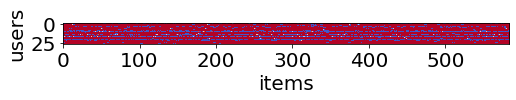

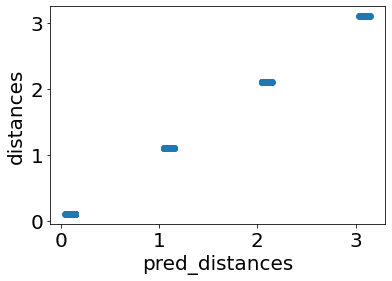

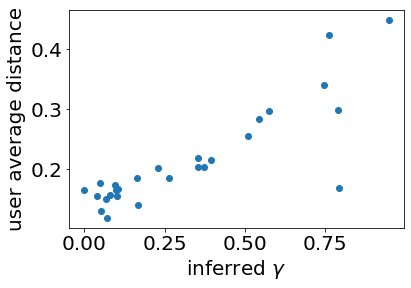

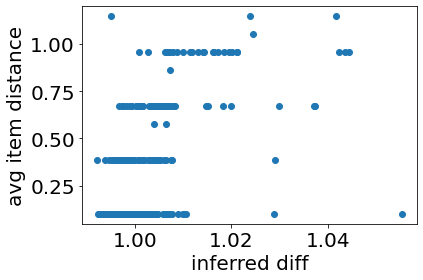

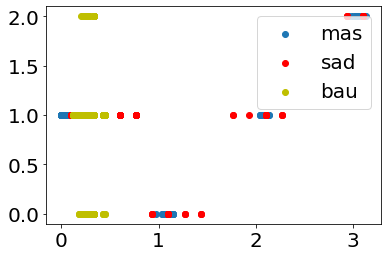

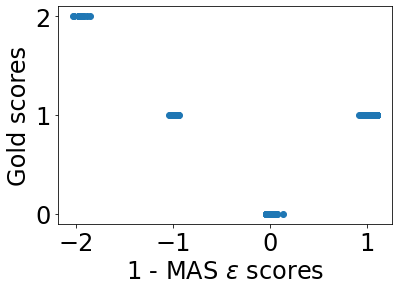

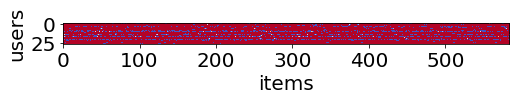

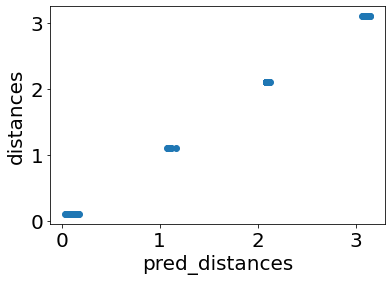

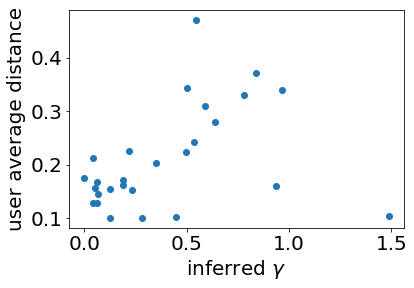

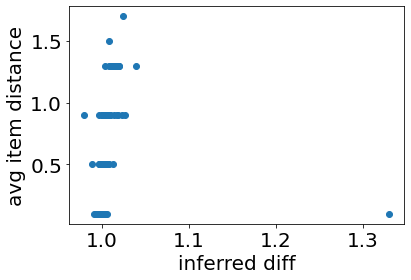

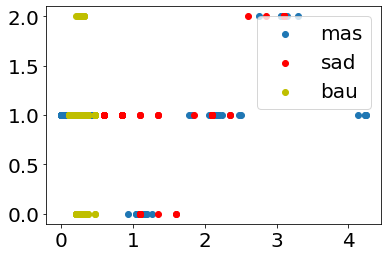

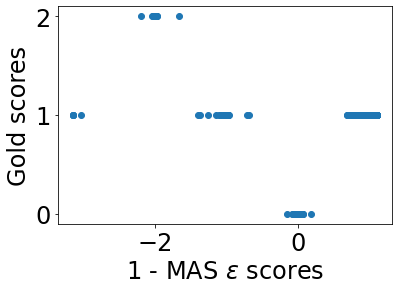

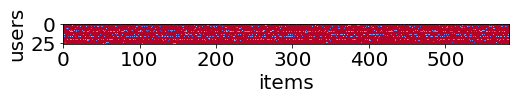

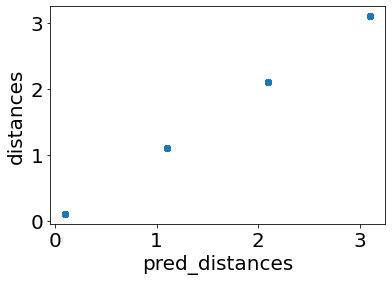

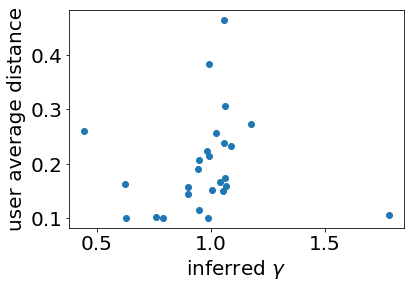

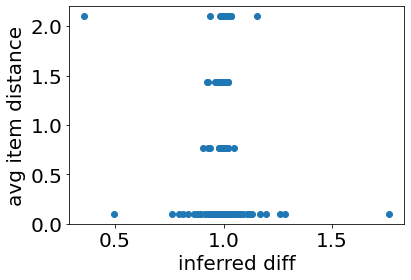

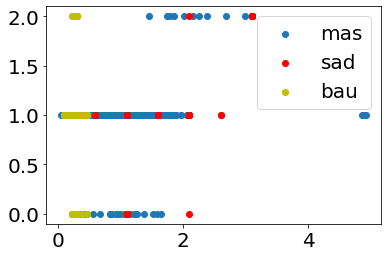

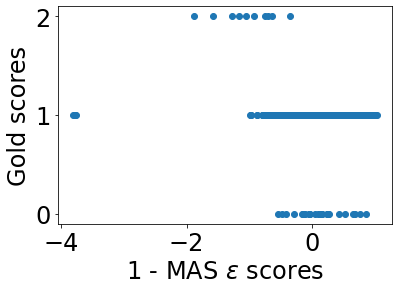

In [38]:
import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("noise_data/answer_face_noise0.95.csv", sep=",")
truth_df = pd.read_csv("noise_data/truth_face.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')




minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():


    for i in range(3):
        dataRed.append(int((minSamples)-(2*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples)-(2*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        movie_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        movie_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        movie_exp.describe_data()

        movie_exp.train()

        movie_exp.test(debug=True)
        _ = movie_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        w_f1_MAS.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='weighted'))
        w_f1_BAU.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='weighted'))
        w_f1_SAD.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='weighted'))

        m_f1_MAS.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='macro'))
        m_f1_BAU.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='macro'))
        m_f1_SAD.append(100*f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='macro'))

        accMAS.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), normalize=True))
        accBAU.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), normalize=True))
        accSAD.append(100*accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), normalize=True))

    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(100*accuracy_score(truth_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(100*f1_score(truth_df['truth'], annotation_df['answer'], average='weighted'))



grapher()

















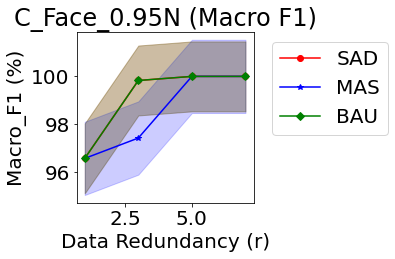

In [39]:
plt.plot(np.array(dataRed),np.array(m_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(m_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(m_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(m_f1_SAD-np.std(m_f1_SAD)),np.array(m_f1_SAD+np.std(m_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(m_f1_MAS-np.std(m_f1_MAS)),np.array(m_f1_MAS+np.std(m_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(m_f1_BAU-np.std(m_f1_BAU)),np.array(m_f1_BAU+np.std(m_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Face_0.95N (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face_0.95N(Macro_F1).png')
plt.show()

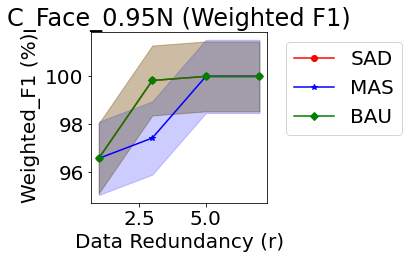

In [40]:
plt.plot(np.array(dataRed),np.array(w_f1_SAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(w_f1_MAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(w_f1_BAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(w_f1_SAD-np.std(w_f1_SAD)),np.array(w_f1_SAD+np.std(w_f1_SAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(w_f1_MAS-np.std(w_f1_MAS)),np.array(w_f1_MAS+np.std(w_f1_MAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(w_f1_BAU-np.std(w_f1_BAU)),np.array(w_f1_BAU+np.std(w_f1_BAU)),alpha=0.2,color='g')


plt.title("C_Face_0.95N (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face_0.95N(Weighted_F1).png')
plt.show()


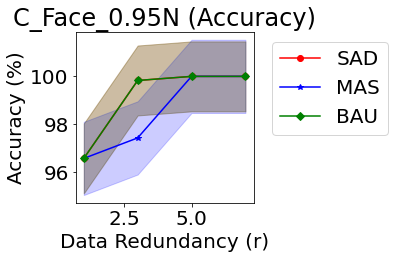

In [41]:
plt.plot(np.array(dataRed),np.array(accSAD),label="SAD",color='r',marker='o')
plt.plot(np.array(dataRed),np.array(accMAS),label="MAS",color='b',marker='*')
plt.plot(np.array(dataRed),np.array(accBAU),label="BAU",color='g',marker='D')

plt.fill_between(np.array(dataRed),np.array(accSAD-np.std(accSAD)),np.array(accSAD+np.std(accSAD)),alpha=0.2,color='r')
plt.fill_between(np.array(dataRed),np.array(accMAS-np.std(accMAS)),np.array(accMAS+np.std(accMAS)),alpha=0.2,color='b')
plt.fill_between(np.array(dataRed),np.array(accBAU-np.std(accBAU)),np.array(accBAU+np.std(accBAU)),alpha=0.2,color='g')


plt.title("C_Face_0.95N (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig('C_Face_0.95N(Accuracy).png')
plt.show()






In [42]:
print(dataRed)
print(w_f1_SAD)
print(m_f1_SAD)
print(m_f1_BAU)
print(m_f1_MAS)

[7, 5, 3, 1]
[100.0, 100.0, 99.82876511499713, 96.57750591933744]
[100.0, 100.0, 99.82876511499713, 96.57750591933743]
[100.0, 100.0, 99.82876511499713, 96.57750591933743]
[100.0, 100.0, 97.42752632867084, 96.57750591933743]
